In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# suppress display of warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set the random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Set your train_dir path
train_dir="Original_Images/Original_Images/"

In [4]:
# Using ImageDataGenerator for data augmentation
generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1  # 10% of the data will be used for validation
)

In [5]:
# Load and split the data into training and validation sets
train_ds = generator.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    subset="training"  # This is for training data
)

Found 2318 images belonging to 31 classes.


In [6]:
val_ds = generator.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    subset="validation"  # This is for validation data
)

Found 244 images belonging to 31 classes.


In [7]:
# Get the list of classes
classes = list(train_ds.class_indices.keys())
print(classes)

['Akshay Kumar', 'Alexandra Daddario', 'Alia Bhatt', 'Amitabh Bachchan', 'Andy Samberg', 'Anushka Sharma', 'Billie Eilish', 'Brad Pitt', 'Camila Cabello', 'Charlize Theron', 'Claire Holt', 'Courtney Cox', 'Dwayne Johnson', 'Elizabeth Olsen', 'Ellen Degeneres', 'Henry Cavill', 'Hrithik Roshan', 'Hugh Jackman', 'Jessica Alba', 'Kashyap', 'Lisa Kudrow', 'Margot Robbie', 'Marmik', 'Natalie Portman', 'Priyanka Chopra', 'Robert Downey Jr', 'Roger Federer', 'Tom Cruise', 'Vijay Deverakonda', 'Virat Kohli', 'Zac Efron']


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import VGG16

# Check if GPU is available
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    # Set memory growth for each GPU
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print("GPU is available.")
else:
    print("No GPU detected.")

IMAGE_SIZE = [128, 128]

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(31, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print("Model created successfully.")

No GPU detected.
58889256/58889256 [==============================] - 7s 0us/step
Model created successfully.


In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [10]:
BATCH_SIZE = 16
history = model.fit(train_ds, epochs=30, validation_data=val_ds, batch_size=BATCH_SIZE)

Epoch 1/30
73/73 [==============================] - 72s 980ms/step - loss: 3.0729 - accuracy: 0.1626 - val_loss: 2.6317 - val_accuracy: 0.2664
Epoch 2/30
73/73 [==============================] - 69s 939ms/step - loss: 1.9925 - accuracy: 0.4288 - val_loss: 2.2321 - val_accuracy: 0.3279
Epoch 3/30
73/73 [==============================] - 67s 914ms/step - loss: 1.5308 - accuracy: 0.5682 - val_loss: 2.1675 - val_accuracy: 0.3238
Epoch 4/30
73/73 [==============================] - 67s 918ms/step - loss: 1.2368 - accuracy: 0.6484 - val_loss: 2.0202 - val_accuracy: 0.4016
Epoch 5/30
73/73 [==============================] - 72s 985ms/step - loss: 1.0491 - accuracy: 0.7209 - val_loss: 2.0137 - val_accuracy: 0.4139
Epoch 6/30
73/73 [==============================] - 71s 975ms/step - loss: 0.9399 - accuracy: 0.7537 - val_loss: 2.0506 - val_accuracy: 0.4057
Epoch 7/30
73/73 [==============================] - 64s 873ms/step - loss: 0.8003 - accuracy: 0.7990 - val_loss: 1.9157 - val_accuracy: 0.4057

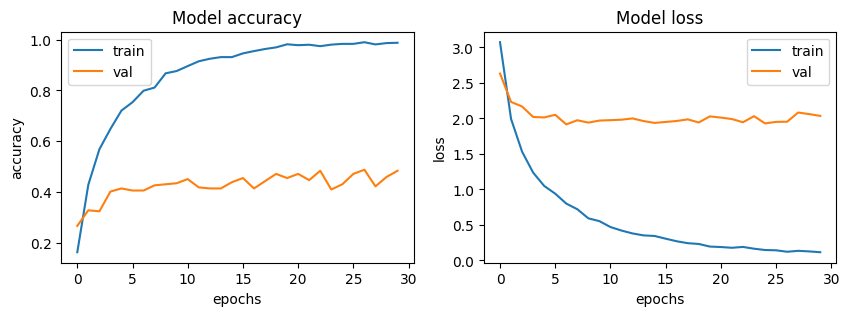

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [12]:
train_loss, train_accuracy = model.evaluate(train_ds)
print(f"Training Accuracy: {train_accuracy*100: .2f}")

73/73 [==============================] - 58s 788ms/step - loss: 0.0927 - accuracy: 0.9948
Training Accuracy:  99.48


In [13]:
validation_loss, validation_accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {train_accuracy*100: .2f}")

8/8 [==============================] - 7s 855ms/step - loss: 2.0913 - accuracy: 0.4549
Validation Accuracy:  99.48


In [14]:
# Evaluate the model on the test set
test_ds = generator.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    subset="validation"  # Use a portion of the data for testing
)

Found 244 images belonging to 31 classes.


In [15]:
# Get accuracy on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

8/8 [==============================] - 7s 846ms/step - loss: 2.0637 - accuracy: 0.4713
Test Accuracy: 47.13%


In [21]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(128, 128, 3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted: "+classes[np.argmax(pred)])

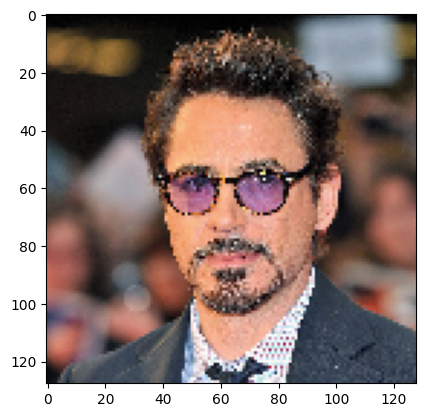

1/1 [==============================] - 0s 51ms/step
Actual: Robert Downey Jr
Predicted: Robert Downey Jr


In [22]:
predict_image("Original_Images/Original_Images/Robert Downey Jr/Robert Downey Jr_110.jpg")